# Автоматическая обработка текстов
## Домашнее задание 2 [10 баллов]
В этом домашнем задании вам потребуется
* проанализировать коллекцию текстов (новостных сообщений) и построить ее тематическую модель.

# Тематическое моделирование.

### Загружаем данные
Для тех, у кого windows (скачайте и распакуйте вручную), выполнять следующие строчки нет необходимости.

In [1]:
!wget https://github.com/yutkin/lenta.ru-news-dataset/raw/master/data/lenta_data.tar.gz.aa

--2018-05-05 10:04:58--  https://github.com/yutkin/lenta.ru-news-dataset/raw/master/data/lenta_data.tar.gz.aa
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yutkin/lenta.ru-news-dataset/master/data/lenta_data.tar.gz.aa [following]
--2018-05-05 10:04:59--  https://raw.githubusercontent.com/yutkin/lenta.ru-news-dataset/master/data/lenta_data.tar.gz.aa
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.36.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.36.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52428800 (50M) [application/octet-stream]
Saving to: <<lenta_data.tar.gz.aa>>

lenta_data.tar.gz.a 100%[===================>]  50.00M  5.21MB/s    in 13s     

2018-05-05 10:05:13 (3.77 MB/s) - <<lenta_data.tar.gz.aa>> sav

In [2]:
!tar -xvf lenta_data.tar.gz.aa

x lenta_data.csv: (Empty error message)
tar: Error exit delayed from previous errors.


### Подготовка и первичный анализ данных [3 балла]

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
import pandas as pd
import seaborn as sns
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
df_full = pd.read_csv("lenta_data.csv", error_bad_lines=False, encoding="utf-8", engine="python")

Заменим строковые названия тем новостей (категории) на порядковые номера тем (перечисление):

In [59]:
topics = df_full.topic.factorize()[1]

In [60]:
df_full.topic = df_full.topic.factorize()[0]

In [61]:
df_full.head(10)

,tags,text,title,topic,url
0,Деловой климат,Заместитель председателя правительства Аркадий...,Правительство прокомментировало идею о запрете...,0,https://lenta.ru/news/2017/04/01/24hours/
1,События,Монреальская конвенция об унификации правил во...,Эксперт отвел год на окончательную ратификацию...,1,https://lenta.ru/news/2017/03/31/motrealwork/
2,Общество,Сотни байкеров в столице Аргентины Буэнос-Айре...,Аргентинские байкеры устроили акцию протеста п...,2,https://lenta.ru/news/2017/03/30/bikers/
3,Политика,Прямая линия с президентом России Владимиром П...,Прямая линия с Путиным пройдет позже обычного,3,https://lenta.ru/news/2017/03/30/straightahead/
4,Футбол,Нападающий английского «Сандерленда» Данкан Уо...,Английский футболист спас трех человек на отды...,4,https://lenta.ru/news/2017/03/30/duncanwatmore/
5,Гаджеты,Президент США Дональд Трамп начал использовать...,Трамп перешел на iPhone,5,https://lenta.ru/news/2017/03/29/zvonilka/
6,Общество,"Стена, которая отделит США от Мексики, может н...",В Вашингтоне засомневались в возможности разде...,2,https://lenta.ru/news/2017/03/29/the_wall/
7,Происшествия,При пожаре в автосервисе на северо-востоке Мос...,При пожаре в московском автосервисе погиб человек,3,https://lenta.ru/news/2017/03/28/pozharvavtose...
8,Политика,Президент США Дональд Трамп примет участие в с...,Трамп поедет на саммит G20 в Гамбурге,2,https://lenta.ru/news/2017/03/28/trumpg20/
9,Рынки,Евро может ослабнуть после победы Марин Ле Пен...,Евро и доллару предсказали равенство в случае ...,6,https://lenta.ru/news/2017/03/27/eurousdequal/


In [62]:
df_full.count()

tags     635617
text     635617
title    635617
topic    635617
url      635617
dtype: int64

#### Посмотрите распределение тем в датасете

In [16]:
len(topics), topics

(23,
 Index(['Бизнес', 'Путешествия', 'Мир', 'Россия', 'Спорт', 'Наука и техника',
        'Финансы', 'Культпросвет ', 'Интернет и СМИ', 'Силовые структуры',
        'Ценности', 'Бывший СССР', 'Из жизни', 'Культура', 'Крым',
        '69-я параллель', 'Легпром', 'Библиотека', 'Недвижимость', 'ЧМ-2014',
        'МедНовости', 'Оружие', 'Сочи'],
       dtype='object'))

Сначала найдем количество статей по каждой категории:

In [74]:
counts = df_full.topic.value_counts()
dist = list()
for index, value in counts.iteritems():
    dist.append((topics[index], value))
dist

[('Россия', 147863),
 ('Мир', 124749),
 ('Финансы', 72736),
 ('Спорт', 55395),
 ('Культура', 48264),
 ('Наука и техника', 48129),
 ('Бывший СССР', 47722),
 ('Интернет и СМИ', 38729),
 ('Из жизни', 23267),
 ('Силовые структуры', 13959),
 ('Бизнес', 6026),
 ('Путешествия', 4006),
 ('Ценности', 3816),
 ('69-я параллель', 567),
 ('Крым', 116),
 ('Легпром', 114),
 ('Культпросвет ', 85),
 ('Библиотека', 65),
 ('Недвижимость', 3),
 ('Оружие', 2),
 ('ЧМ-2014', 2),
 ('МедНовости', 1),
 ('Сочи', 1)]

Мы видим, что статьи распределены по категориям неравномерно, некоторые категории практически пустые.

Построим гистограмму тем (df_full.topic). Мы можем сдеать это с помощью функции hist:

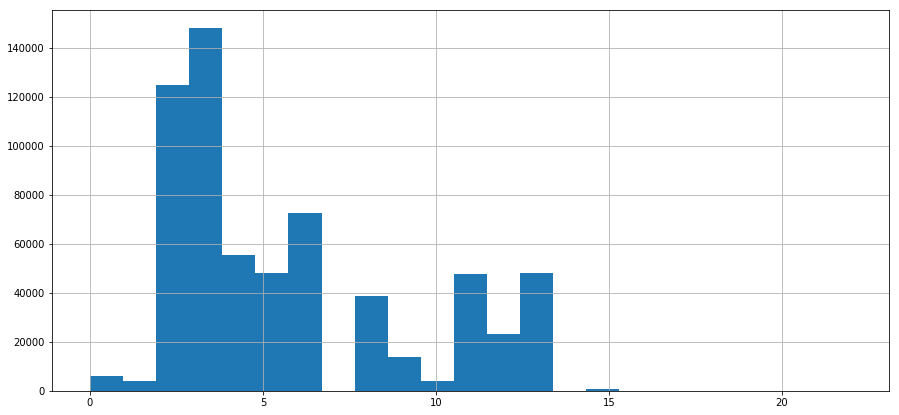

In [71]:
plt.figure(figsize=(15, 7))
df_full.topic.hist(bins=23)

Длят отображения распределения новостей по категориям также можно использовать обычную столбчатую диаграмму, построенную на результатах df_full.topic.value_counts():

<BarContainer object of 23 artists>

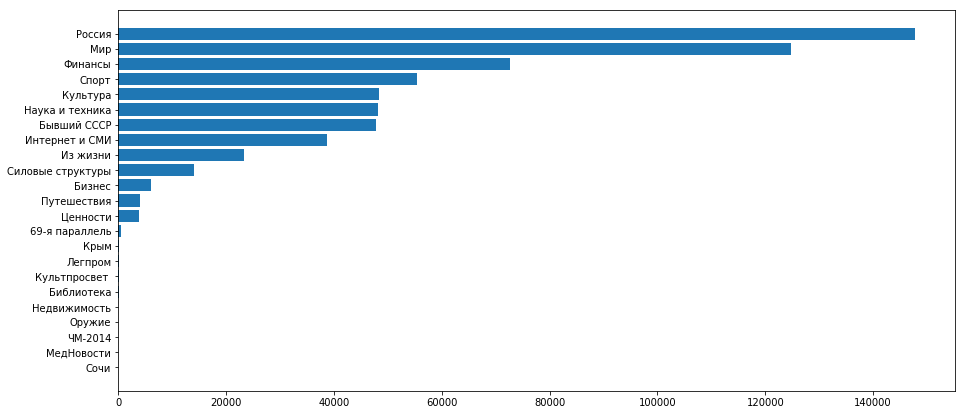

In [84]:
plt.figure(figsize=(15, 7))
plt.barh(*list(zip(*reversed(dist))))

Часть категорий, похоже, содержит недостаточно данных для обучения.

#### Сэмплирование

Для того, чтобы ускорить работу на имеющемся железе, сделаем выборку из исходных данных -- равное количество строк для каждого класса:

In [86]:
import numpy as np


def balanced_sample_maker(X, y, sample_size, random_seed=None):
    """ return a balanced data set by sampling all classes with sample_size 
        current version is developed on assumption that the positive
        class is the minority.

    Parameters:
    ===========
    X: {numpy.ndarrray}
    y: {numpy.ndarray}
    """
    uniq_levels = np.unique(y)
    uniq_counts = {level: sum(y == level) for level in uniq_levels}

    if not random_seed is None:
        np.random.seed(random_seed)

    # find observation index of each class levels
    groupby_levels = {}
    for ii, level in enumerate(uniq_levels):
        obs_idx = [idx for idx, val in enumerate(y) if val == level]
        groupby_levels[level] = obs_idx
    # oversampling on observations of each label
    balanced_copy_idx = []
    for gb_level, gb_idx in groupby_levels.items():
        over_sample_idx = np.random.choice(gb_idx, size=min(sample_size, len(groupby_levels[gb_level])), replace=True).tolist()
        balanced_copy_idx+=over_sample_idx
    np.random.shuffle(balanced_copy_idx)

    return X[balanced_copy_idx], y[balanced_copy_idx], balanced_copy_idx

In [87]:
X, y, balanced_copy_idx = balanced_sample_maker(np.array(df_full.text), df_full.topic, 500)

In [88]:
df = df_full.iloc[balanced_copy_idx]

In [89]:
len(df), len(df.topic.unique())

(7389, 23)

In [90]:
df.head()

,tags,text,title,topic,url
318528,События,Жительница США проехала почти 640 километров н...,Американка проехала сотни километров на такси ...,1,https://lenta.ru/news/2016/12/12/uber_ride/
308105,Все,Компания AOL Time Warner в понедельник объявил...,Главный охранник Белого дома возглавил службу ...,8,https://lenta.ru/internet/2001/12/11/aol/
533239,Все,Бывший шеф-редактор и руководитель отдела поли...,Бывший шеф-редактор The New Times станет спецк...,8,https://lenta.ru/news/2012/08/02/barabanov/
398363,Все,В 2016 году правительство России потратит на о...,"На очистку Арктики потратят 1,6 миллиарда рублей",15,https://lenta.ru/news/2016/03/30/arcticbillions/
269597,Космос,Многоразовая первая ступень ракеты-носителя Fa...,Первая ступень Falcon 9 опрокинулась при посад...,5,https://lenta.ru/news/2015/04/15/falcon/


Постпроим гистограмму тем (df.topic) -- важно указать правильное количество корзин, равное количеству категорий.

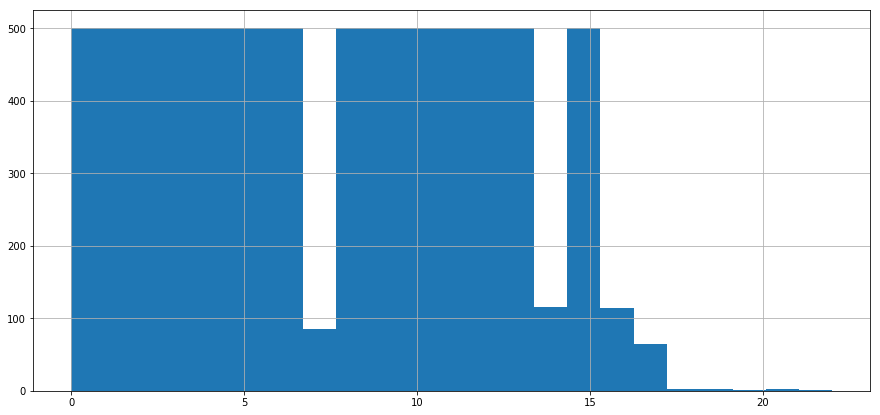

In [94]:
plt.figure(figsize=(15, 7))
df.topic.hist(bins=23)

Видно, что у нас действительно не более 500 строк в каждой категории, но некоторые категории содержат недостаточно данных -- их было недостаточно в исходных данных.

Также можем посмотреть на количество документов в каждой категории с помощью df.topic.value_counts(): 

In [95]:
df_counts = df.topic.value_counts()
df_dist = list()
for index, value in df_counts.iteritems():
    df_dist.append((topics[index], value))
df_dist

[('Бизнес', 500),
 ('Из жизни', 500),
 ('Интернет и СМИ', 500),
 ('Путешествия', 500),
 ('Наука и техника', 500),
 ('Силовые структуры', 500),
 ('Культура', 500),
 ('69-я параллель', 500),
 ('Мир', 500),
 ('Финансы', 500),
 ('Ценности', 500),
 ('Спорт', 500),
 ('Россия', 500),
 ('Бывший СССР', 500),
 ('Крым', 116),
 ('Легпром', 114),
 ('Культпросвет ', 85),
 ('Библиотека', 65),
 ('Недвижимость', 3),
 ('ЧМ-2014', 2),
 ('Оружие', 2),
 ('МедНовости', 1),
 ('Сочи', 1)]

Удалим из выборки категории, содержащие менее 500 статей:

In [97]:
df_counts < 500

0     False
12    False
8     False
1     False
5     False
9     False
13    False
15    False
2     False
6     False
10    False
4     False
3     False
11    False
14     True
16     True
7      True
17     True
18     True
19     True
21     True
20     True
22     True
Name: topic, dtype: bool

In [107]:
df = df[df['topic'].isin(df_counts.index[df_counts == 500])]

In [108]:
len(df), len(np.unique(df.topic))

(7000, 14)

Таким образом мы оставили 14 категорий по 500 документов в каждой, итого 7000 документов

#### Токенизация

Оставим только русские слова и приведем все слова к нижнему регистру:

In [117]:
import re
regex = re.compile("[А-Яа-я]+")

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))


df.text = df.text.str.lower()
df.text = df.text.apply(words_only)

df.text.iloc[3]

'в году правительство россии потратит очистку арктики миллиарда рублей об сообщает тасс ссылкой министра природных ресурсов экологии сергея донского по словам чиновника году должна завершена очистка острова земля александры работы архипелаге земля франца иосифа будут продолжены году очистка архипелаге земля франца иосифа началась году работы проводились островах земля александры гукера они включали вывоз отходов отработанного топлива горюче смазочных материалов утилизация отходов арктике идет плану разработанному году минприроды совместно нии совет изучению производительных сил как сообщали риа новости январе года директор департамента международного сотрудничества минприроды нуритдин инамов заявил россия году намерена вывести утилизировать менее тысяч тонн отходов еще тысячу тонн планируется вывести новой земли программа очистке рассчитана года проект очистка арктики поддерживается русским географическим обществом фгупом севморгео фондом полярных исследований полярный фонд норильский 

#### Удалияем из текста лишние символы/стоп-слова

In [118]:
from nltk.corpus import stopwords

mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д', '-', '-']

def remove_stopwords(text, stopwords=mystopwords):
    try:
        return " ".join([token for token in text.split() if token not in stopwords])
    except:
        return ""
df.text = df.text.apply(remove_stopwords)

Частота слов:

In [128]:
from nltk import FreqDist

def top_words(top):
    fd = FreqDist()
    for item in df.text:
        fd.update(item.split())
    return fd.most_common(top)

top_words(20)

[('года', 6234),
 ('году', 3893),
 ('сообщает', 3621),
 ('россии', 3539),
 ('время', 2539),
 ('словам', 1997),
 ('долларов', 1995),
 ('компании', 1988),
 ('который', 1754),
 ('рублей', 1746),
 ('сша', 1690),
 ('заявил', 1664),
 ('ранее', 1594),
 ('однако', 1575),
 ('которые', 1560),
 ('тысяч', 1549),
 ('процентов', 1494),
 ('компания', 1456),
 ('около', 1439),
 ('будут', 1382)]

#### Лемматизация

In [132]:
%%time 
from pymystem3 import Mystem

mystem = Mystem()

def lemmatize(text, mystem=mystem):
    try:
        return "".join(mystem.lemmatize(text)).strip()
    except:
        return ""
    
df.text = df.text.apply(lemmatize)
top_words(20)

CPU times: user 6.59 s, sys: 357 ms, total: 6.95 s
Wall time: 1min 4s


In [133]:
top_words(20)

[('год', 13178),
 ('который', 7811),
 ('сообщать', 5567),
 ('россия', 4492),
 ('компания', 4340),
 ('время', 3131),
 ('российский', 3109),
 ('свой', 2957),
 ('становиться', 2941),
 ('процент', 2797),
 ('новый', 2775),
 ('заявлять', 2728),
 ('человек', 2532),
 ('первый', 2411),
 ('слово', 2364),
 ('тысяча', 2318),
 ('доллар', 2270),
 ('страна', 2266),
 ('миллион', 2228),
 ('отмечать', 2162)]

Дополнительная очистка от стоп-слов после лематизации:

In [138]:
mystoplemmas = ['год', 'который','сообщать', 'свой', 'становиться', 'заявлять', 'тысяча', 'миллион', 'миллиард' ]
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

df.text = df.text.apply(remove_stoplemmas)  
top_words(20)

[('россия', 4492),
 ('компания', 4340),
 ('время', 3131),
 ('российский', 3109),
 ('процент', 2797),
 ('новый', 2775),
 ('человек', 2532),
 ('первый', 2411),
 ('слово', 2364),
 ('доллар', 2270),
 ('страна', 2266),
 ('отмечать', 2162),
 ('получать', 2069),
 ('один', 2027),
 ('рубль', 2025),
 ('президент', 1870),
 ('составлять', 1719),
 ('представитель', 1700),
 ('сша', 1690),
 ('ранее', 1594)]

#### Облако слов

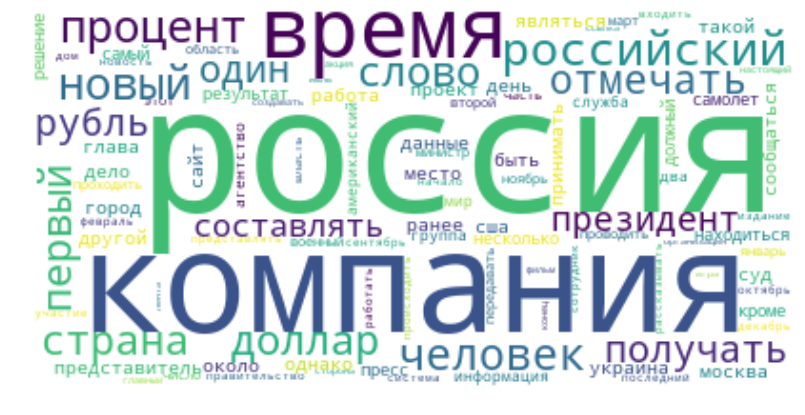

In [139]:
from wordcloud import *

word_freq = [i for i in top_words(100)]
wd = WordCloud(background_color = 'white')
wd.generate_from_frequencies(dict(word_freq))
plt.figure(figsize=(15, 7))
plt.imshow(wd, interpolation = 'bilinear')
plt.axis('off')
plt.show()

На данном этапе будем считать, что остались только информативные слова.

### Визуализация данных [1 балл]
Используйте T-SNE, чтобы посмотреть на данные в двумерном виде.

In [147]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer


In [151]:
%%time
vectors = TfidfVectorizer().fit_transform(df.text)
X_reduced = TruncatedSVD(n_components=5, random_state=0).fit_transform(vectors)


CPU times: user 2min 33s, sys: 22.3 s, total: 2min 55s
Wall time: 3min 10s


In [154]:
%%time
X_embedded = TSNE(n_components=2, perplexity=30, verbose=0).fit_transform(X_reduced)

CPU times: user 3min 43s, sys: 22.2 s, total: 4min 6s
Wall time: 4min 16s


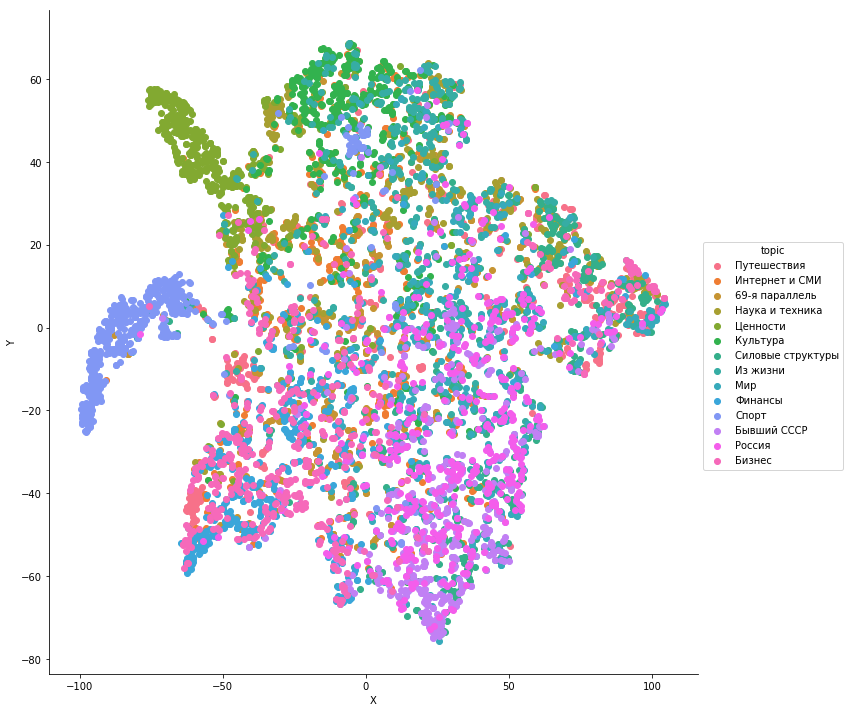

In [155]:
vis_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : df.topic.apply(lambda x: topics[x])})
sns.FacetGrid(vis_df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.006s...
[t-SNE] Computed neighbors for 7000 samples in 0.222s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 0.012387
[t-SNE] Computed conditional probabilities in 0.212s
[t-SNE] Iteration 50: error = 100.1960220, gradient norm = 0.0224804 (50 iterations in 15.045s)
[t-SNE] Iteration 100: error = 86.7493973, gradient norm = 0.0035988 (50 iterations in 9.211s)
[t-SNE] Iteration 150: error = 85.3929672, gradient norm = 0.0019859 (50 iterations in 9.522s)
[t-SNE] Iteration 200: error 

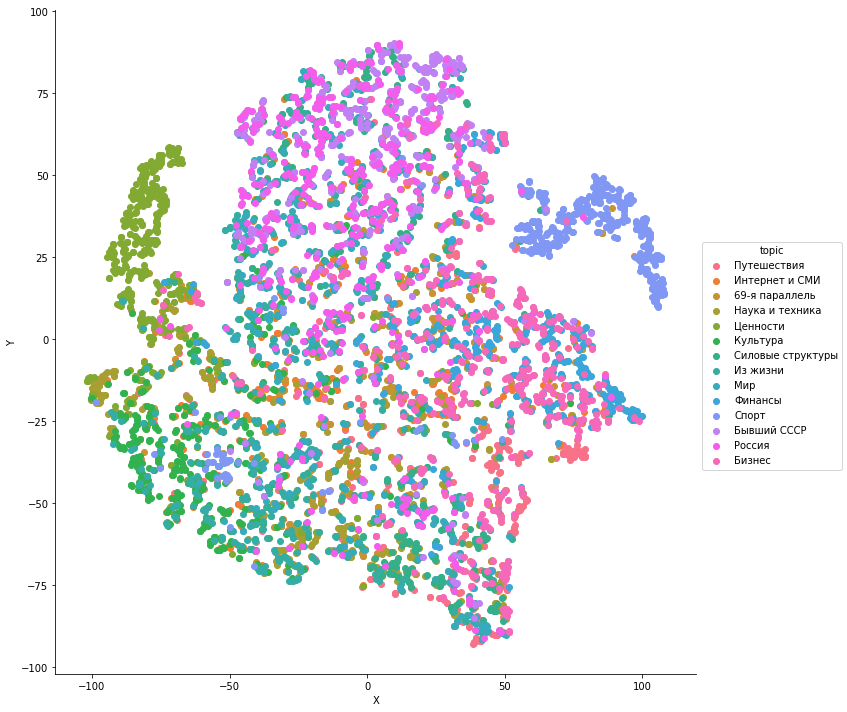

In [156]:
%%time
X_embedded = TSNE(n_components=2, perplexity=15, verbose=2).fit_transform(X_reduced)
vis_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : df.topic.apply(lambda x: topics[x])})
sns.FacetGrid(vis_df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()

Можно ли сделать какой-то вывод по этому графику?

<your answer here>

<your answer here>

### Создайте корпус и обучите тематическую модель [2 балла]
Выделите термины из текста и создайте корпус для gensim или другой библиотеки.

In [ ]:
<your code here>

### Интерпретация результатов [2 балла]
Посмотрите на результаты с помощью gensimvis

In [ ]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis
vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

Проинтерпретируйте результаты и попытайтесь соотнести темы с topics.

<your answer here>

### Оцените качество работы модели [1 балл]
Вычислите перплексию для модели.

In [ ]:
<your code here>

### Применение модели [1 балл]
Выберите несколько текстов из коллекции и найдите распределение тем для них.

In [ ]:
<your code here>

## Дополнительное задание * [5 баллов]
Проведите анализ зависимости качества от терминов, которые используются в модели

In [ ]:
<your code here>

## Сдача домашнего задания

Дедлайн сдачи домашнего задания:  конец курса. 

Результаты домашнего задания должны быть оформлены в виде отчета в jupyter notebook.
Нормальный отчёт должен включать в себя:
* Краткую постановку задачи и формулировку задания
* Описание минимума необходимой теории и/или описание используемых инструментов 
* Подробный пошаговый рассказ о проделанной работе
* **Аккуратно** оформленные результаты
* Подробные и внятные ответы на все заданные вопросы 
* Внятные выводы – не стоит относится к домашнему заданию как к последовательности сугубо технических шагов, а стоит относится скорее как к небольшому практическому исследованию, у которого есть своя цель и свое назначение.


Сдача отчетов осуществляется по email: login-const@mail.ru, заголовок письма – NLP-HSE-HW2-ИмяФамилия. 
